In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml

In [20]:
from sklearn.datasets import fetch_openml
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, cache=True, parser='auto')

# Extract features and labels
X, y = mnist['data'], mnist['target']

# Convert data to float64 and labels to integers
X = X.astype('float64')
y = y.astype(int)

# Subset data to use only class 0 and class 1
indices = np.logical_or(y == 0, y == 1)
X = X[indices]
y = y[indices]



In [21]:
# Standardize the dataset
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X_std[X_std == 0] = 1  # avoid division by zero
X = (X - X_mean) / X_std


In [22]:
X=np.array(X)
y=np.array(y)
print(y.shape) 
print(X.shape)

(14780,)
(14780, 784)


In [23]:
def train_test_split(X, y):
    # Shuffle the training data
    num_training_examples = X.shape[0]
    shuffle_indices = np.random.permutation(num_training_examples)
    x_shuffled = X[shuffle_indices]
    y_shuffled = y[shuffle_indices]

    n=int(X.shape[0]/10)#10 -> 1478
    start=0
    end=8*n
    X_train=x_shuffled[start:end,:]
    X_test=x_shuffled[end:,:]
    y_train=y_shuffled[0:end]
    y_test=y_shuffled[end:]
    return X_train, X_test, y_train, y_test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [25]:
def split_folds(X, y, n_folds=10):
    n = X.shape[0]     # number of samples
    folds = []       # list of folds
    for i in range(n_folds):  
        start = int(i * n / n_folds)   # start index of fold
        end = int((i + 1) * n / n_folds)  # end index of fold
        folds.append((X[start:end], y[start:end]))   # append fold to list
    return folds

In [26]:
fold_splits = split_folds(X_train, y_train, n_folds=10)  # split data into 10 folds

In [27]:
def compute_cost(X, y, w, b):
    EPSILON = 1e-10  # Small constant to avoid taking the logarithm of zero
    n, d = X.shape  # n: number of samples, d: number of features
    z = np.dot(X, w) + b  # linear function
    y_hat = 1 / (1 + np.exp(-z))  # sigmoid function
    cost = -(np.dot(y.T, np.log(y_hat + EPSILON)) + np.dot((1 - y).T, np.log(1 - y_hat + EPSILON))) / n  # cross-entropy loss
    return cost

In [28]:
def logistic_regression(X, y,w ,b,lr=0.1, max_iter=1000, tol=1e-4):
    n, d = X.shape      # n: number of samples, d: number of features
    for i in range(max_iter):
        # Compute the gradient
        z = np.dot(X, w) + b  
        y_hat = 1 / (1 + np.exp(-z))  
        grad_w = np.dot(X.T, y_hat - y) / n   
        grad_b = np.sum(y_hat - y) / n   

        # Update the weights
        w_new = w - lr * grad_w
        b_new = b - lr * grad_b

        # Check convergence
        if np.linalg.norm(w_new - w) < tol and np.abs(b_new - b) < tol:
            break

        # Update weights and bias
        w = w_new
        b = b_new
    cost = compute_cost(X,y,w,b)


    return w, b,cost

In [29]:
def predict(X, w, b):
    z = np.dot(X, w) + b
    y_hat = 1 / (1 + np.exp(-z))
    return y_hat

In [30]:
def accuracy(y, y_hat):
    return np.mean(y == y_hat) * 100


In [ ]:
lering_rates = [1.0,0.1, 0.01, 0.001,0.0001]
avg_accuracy = []
for lr in lering_rates:
    accuracy_scores = []
    print("------------------------------------")   
    for i in range(10):
        w = np.random.randn(X.shape[1])  # initialize weights
        b = np.random.randn(1)        # initialize bias
        X_train = np.concatenate([fold_splits[j][0] for j in range(10) if j != i])  # concatenate all folds except fold i for training
        y_train = np.concatenate([fold_splits[j][1] for j in range(10) if j != i])  # concatenate all folds except fold i  for training
        X_test = fold_splits[i][0] # fold i for testing
        y_test = fold_splits[i][1] # fold i for testing 
        w,b,cost=logistic_regression(X_train, y_train, w,b,lr)  # train model 
        y_hat = predict(X_test, w, b)  # predict on test set
        y_hat = np.round(y_hat) # round predictions to nearest integer (0 or 1)
        score=accuracy(y_test, y_hat)  # compute accuracy
        accuracy_scores.append(score)  # append accuracy to list 
        print("Accuracy for fold {} with learning rate {} is {}".format(i+1, lr, score))
    print("------------------------------------")    
    print("Average accuracy for learning rate {} is {}".format(lr, np.mean(accuracy_scores)))    
    avg_accuracy.append(np.mean(accuracy_scores))

------------------------------------
Accuracy for fold 1 with learning rate 1.0 is 99.3234100135318
Accuracy for fold 2 with learning rate 1.0 is 99.6617050067659
Accuracy for fold 3 with learning rate 1.0 is 99.86468200270636
Accuracy for fold 4 with learning rate 1.0 is 99.39106901217862
Accuracy for fold 5 with learning rate 1.0 is 99.25575101488498
Accuracy for fold 6 with learning rate 1.0 is 99.6617050067659
Accuracy for fold 7 with learning rate 1.0 is 99.45872801082544
Accuracy for fold 8 with learning rate 1.0 is 99.52638700947226
Accuracy for fold 9 with learning rate 1.0 is 99.52638700947226
Accuracy for fold 10 with learning rate 1.0 is 99.72936400541272
------------------------------------
Average accuracy for learning rate 1.0 is 99.53991880920162
------------------------------------
Accuracy for fold 1 with learning rate 0.1 is 99.3234100135318
Accuracy for fold 2 with learning rate 0.1 is 99.3234100135318
Accuracy for fold 3 with learning rate 0.1 is 99.59404600811908
A

In [31]:
w = np.random.randn(X.shape[1]) 
b = np.random.randn(1)
w,b,cost=logistic_regression(X_train, y_train, w,b,1) 

In [34]:
y_hat = predict(X_test, w, b)  # predict on test set
y_hat = np.round(y_hat)        # round predictions to nearest integer (0 or 1)
score=accuracy(y_test, y_hat)  # compute accuracy
print("Accuracy for test set is {}".format(score))

Accuracy for test set is 99.56021650879568


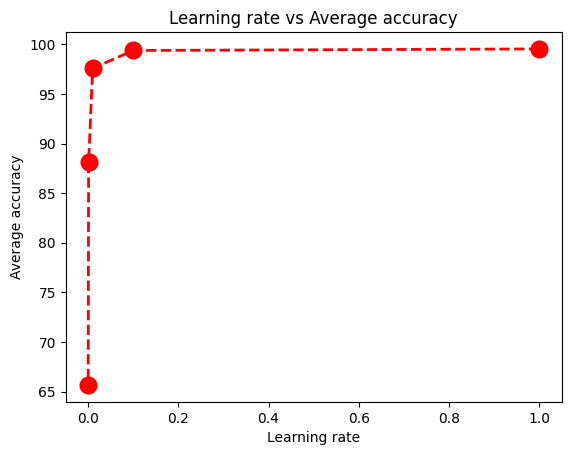

In [ ]:
plt.plot(lering_rates, avg_accuracy, marker='o', color='red', linestyle='dashed', linewidth=2, markersize=12)
plt.title("Learning rate vs Average accuracy")
plt.xlabel("Learning rate")
plt.ylabel("Average accuracy")
plt.show()


In [ ]:
np.savez("model_parameters.npz", w=w, b=b)  # save model parameters to file